In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import os

from siamese_model import build_siamese_model
from siamese_model import n_way_1shot_task
from preprocess_data import omniglot_download

### Plotting training and validation accuracies

In [6]:
def plot_accuracies(tr, val, val_nway):
    steps = np.array(range(len(tr)))
    fig, ax = plt.subplots(figsize=(8,5))
    ax.plot(steps, tr, 'k-', label="training")
    ax.plot(steps, val, 'b-', label="1_way validation")
    ax.plot(steps, val_nway, 'r-', label="20_way validation")
    ax.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    ax.set_xlabel('#Steps')
    ax.set_ylabel('Accuracies')
    ax.legend(loc='best')

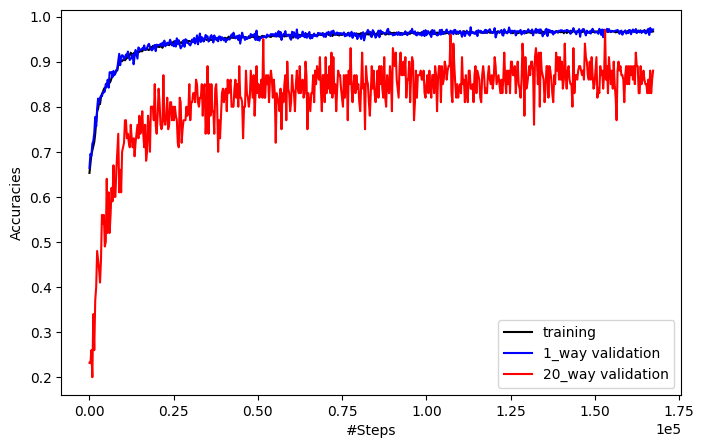

In [7]:
train_acc = []
val_acc = []
val_nway_acc = []
with open("accuracies.pickle", "rb") as f:
    while True:
        try:
            tr, val, val_nway = pickle.load(f)
            train_acc.extend(tr)
            val_acc.extend(val)
            val_nway_acc.extend(val_nway)
        except EOFError:
            break


plot_accuracies(train_acc, val_acc, val_nway_acc)

### Testing N-way One-shot learning

In [23]:
omniglot_download("omniglot_data")
_, siamese_model = build_siamese_model()

# load weights into the model
output_path = "./"
best_filename = output_path + "best.weights.h5"
siamese_model.load_weights(best_filename)

In [ ]:
n_way = np.arange(1, 21, 1)
acc = np.zeros((len(n_way), 10))
for i, n in enumerate(n_way):
    for j in range(10):
        acc[i, j] = n_way_1shot_task(siamese_model, n_way=n, n_trials=1000,
                                     display=False)
acc_mean = np.mean(acc, axis=1)
acc_std = np.std(acc, axis=1)
with open(os.path.join(output_path, 'nway_accuracies.pickle'), 'wb') as f:
    pickle.dump((acc_mean, acc_std), f)

In [28]:
output_path = "./"
file_name = output_path + "nway_accuracies.pickle"
mean_nway_acc = []
with open(file_name, "rb") as f:
    mean_nway_acc, std_nway_acc = pickle.load(f)
print(len(mean_nway_acc))

20


#### Plotting test accuracy

Text(0, 0.5, 'Accuracy')

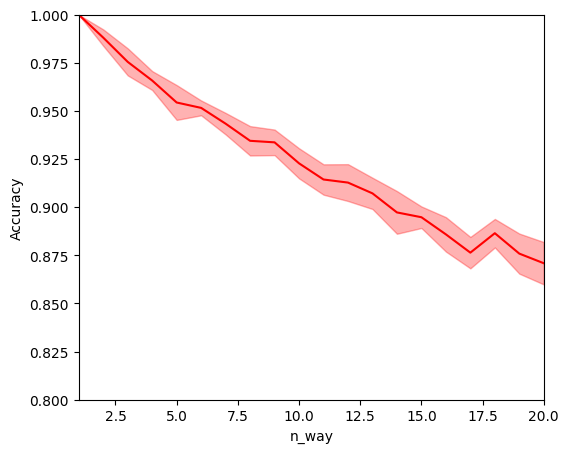

In [12]:
fig, ax = plt.subplots(figsize=(6,5))
n_way = [int(i) for i in np.arange(1, 21, 1)]
ax.plot(n_way, mean_nway_acc, 'r-')
mean_nway_acc = np.array(mean_nway_acc)
ax.fill_between(n_way, mean_nway_acc-std_nway_acc, mean_nway_acc+std_nway_acc,
                color='r', alpha=0.3)
ax.set_xlim([1, 20])
ax.set_ylim([0.8,1])

ax.set_xlabel('n_way')
ax.set_ylabel('Accuracy')

In [14]:
print("One-shot 5-way Accuracy: {:.2f} \u00B1 {:.2f} %".format(100*mean_nway_acc[4], 100*std_nway_acc[4]))
print("One-shot 10-way Accuracy: {:.2f} \u00B1 {:.2f} %".format(100*mean_nway_acc[9], 100*std_nway_acc[9]))
print("One-shot 20-way Accuracy: {:.2f} \u00B1 {:.2f} %".format(100*mean_nway_acc[19], 100*std_nway_acc[19]))

One-shot 5-way Accuracy: 95.44 ± 0.90 %
One-shot 10-way Accuracy: 92.28 ± 0.78 %
One-shot 20-way Accuracy: 87.09 ± 1.10 %


#### Plotting example images with their predictions

##### One-shot 5-way test




Average accuracy= 100.0


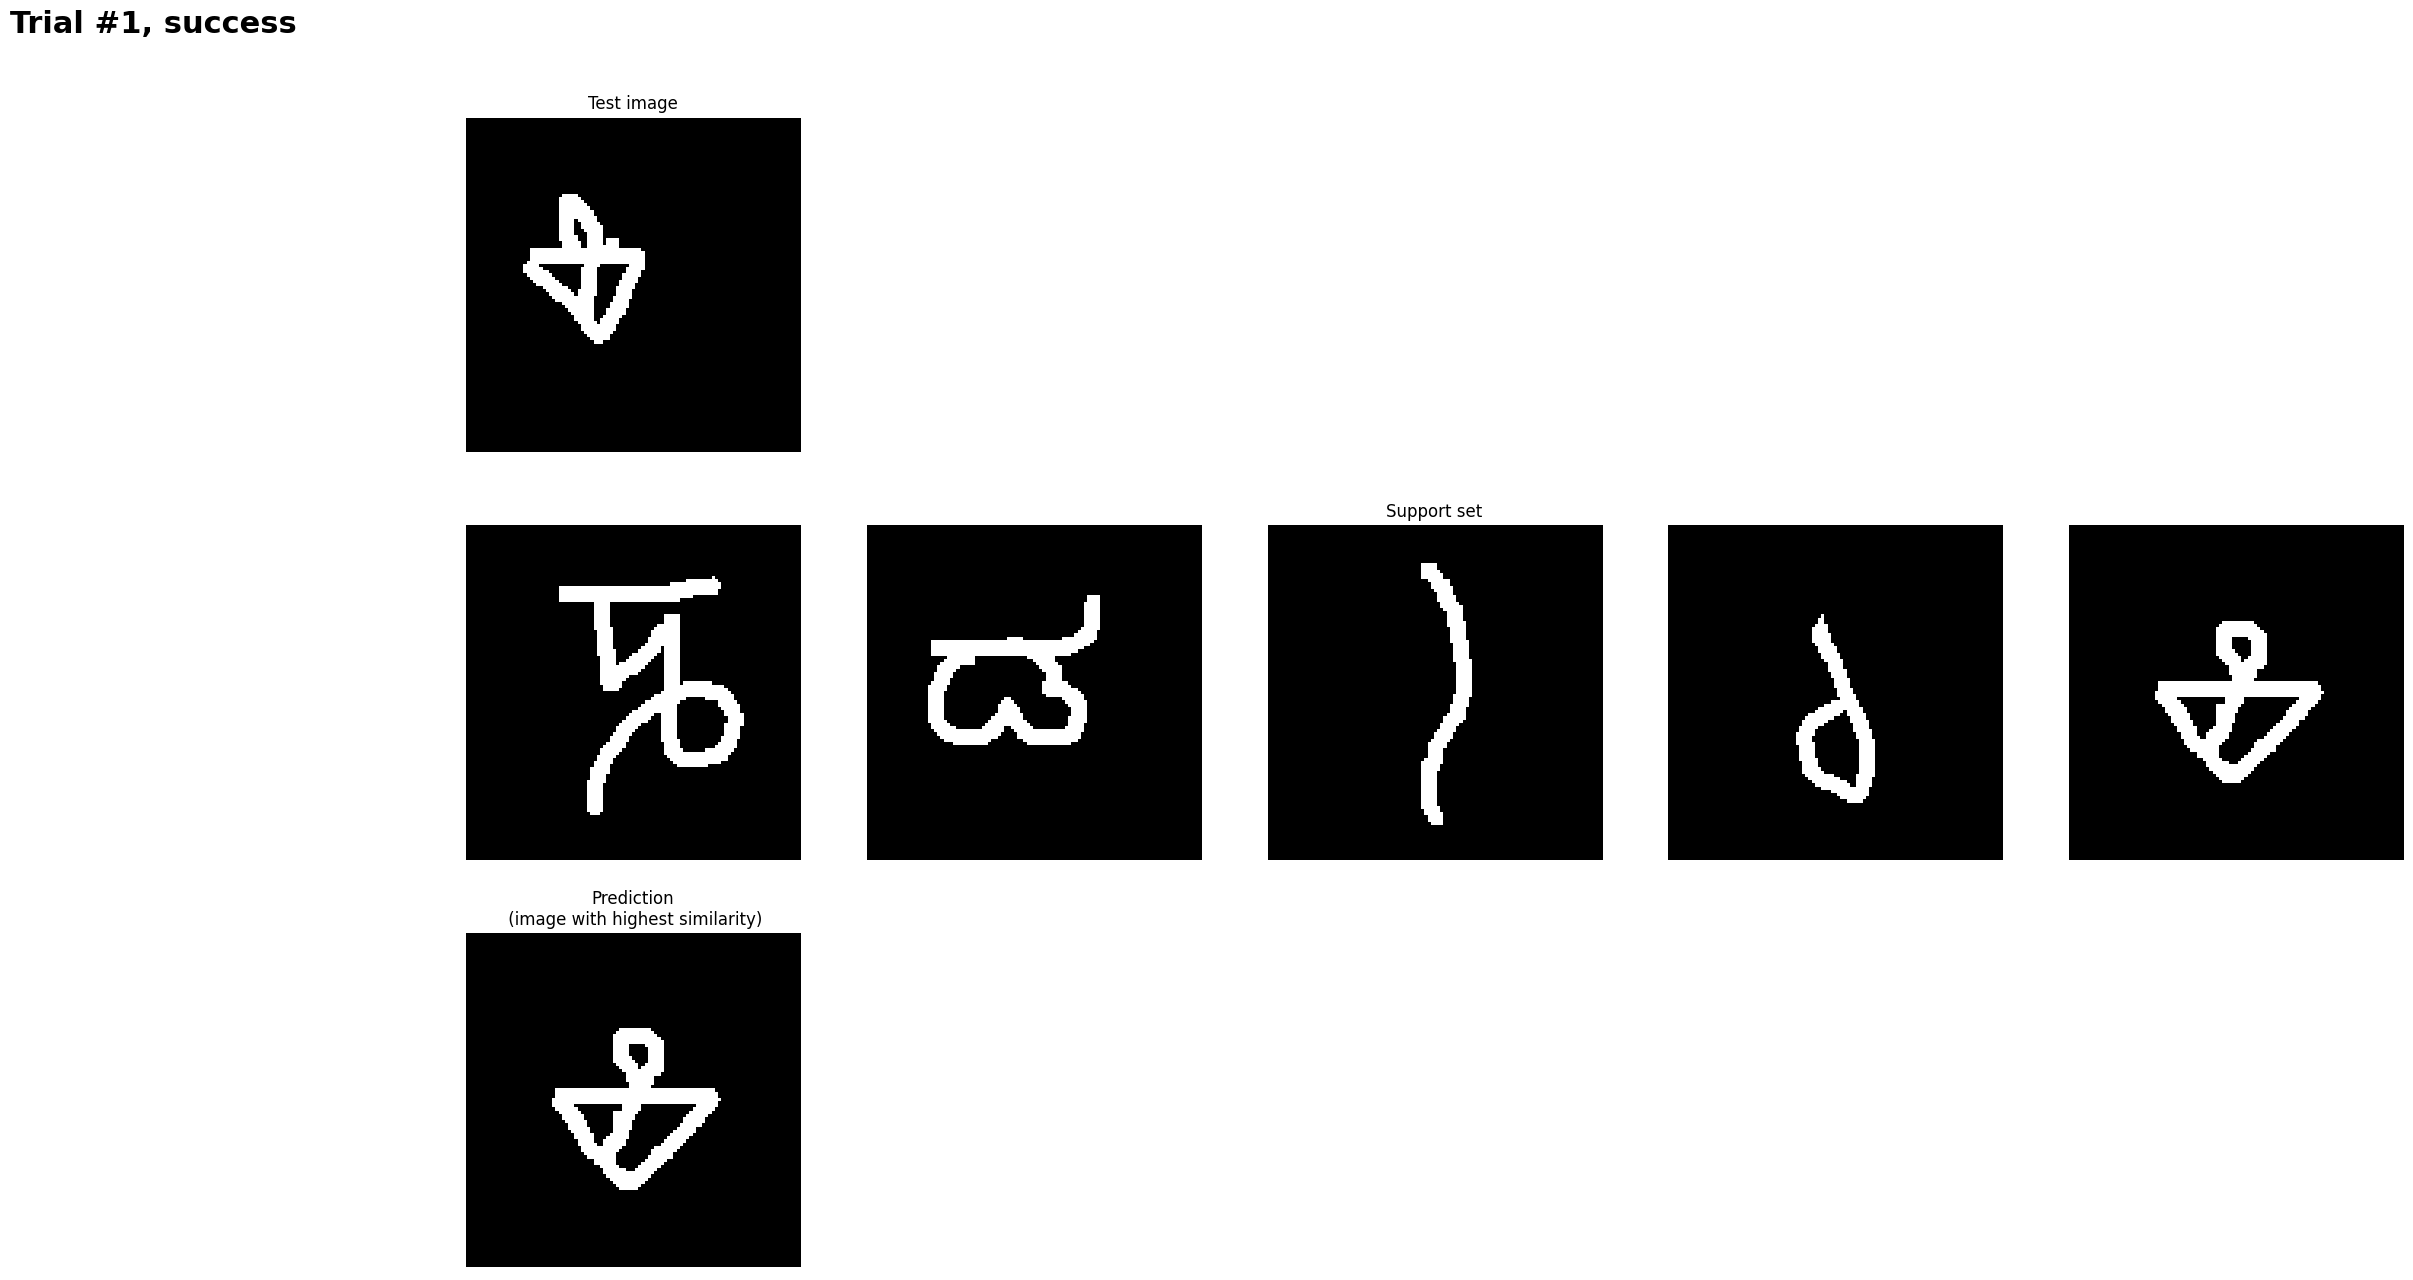

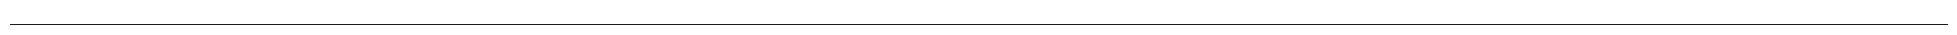

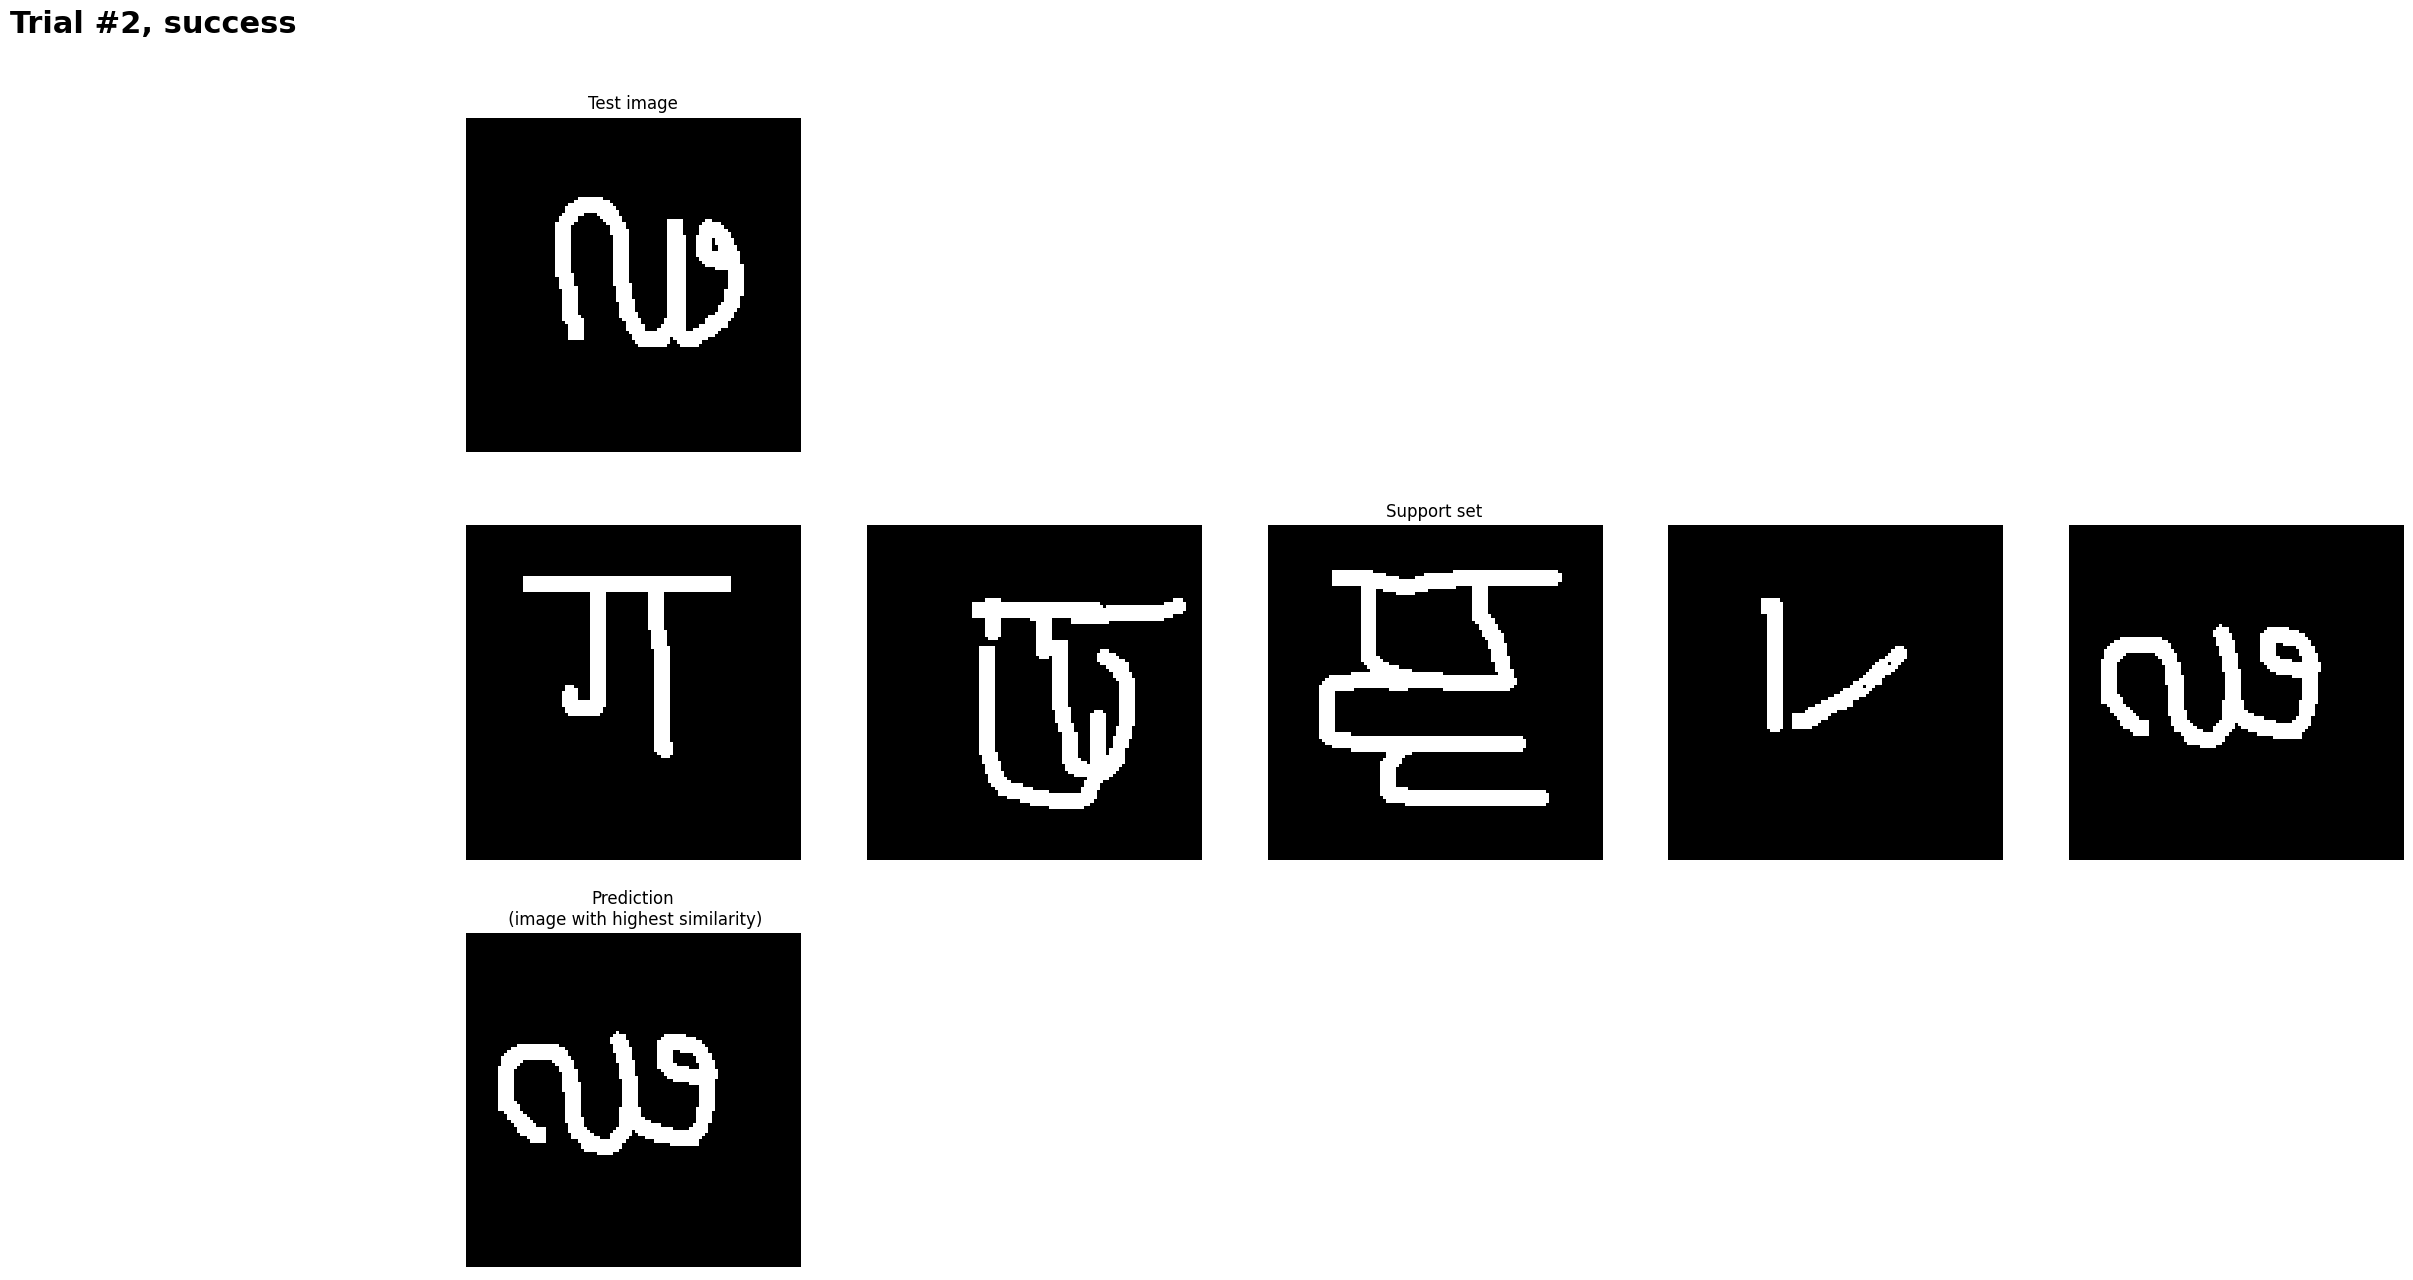

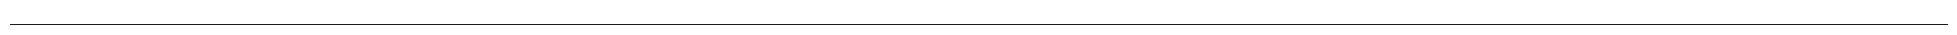

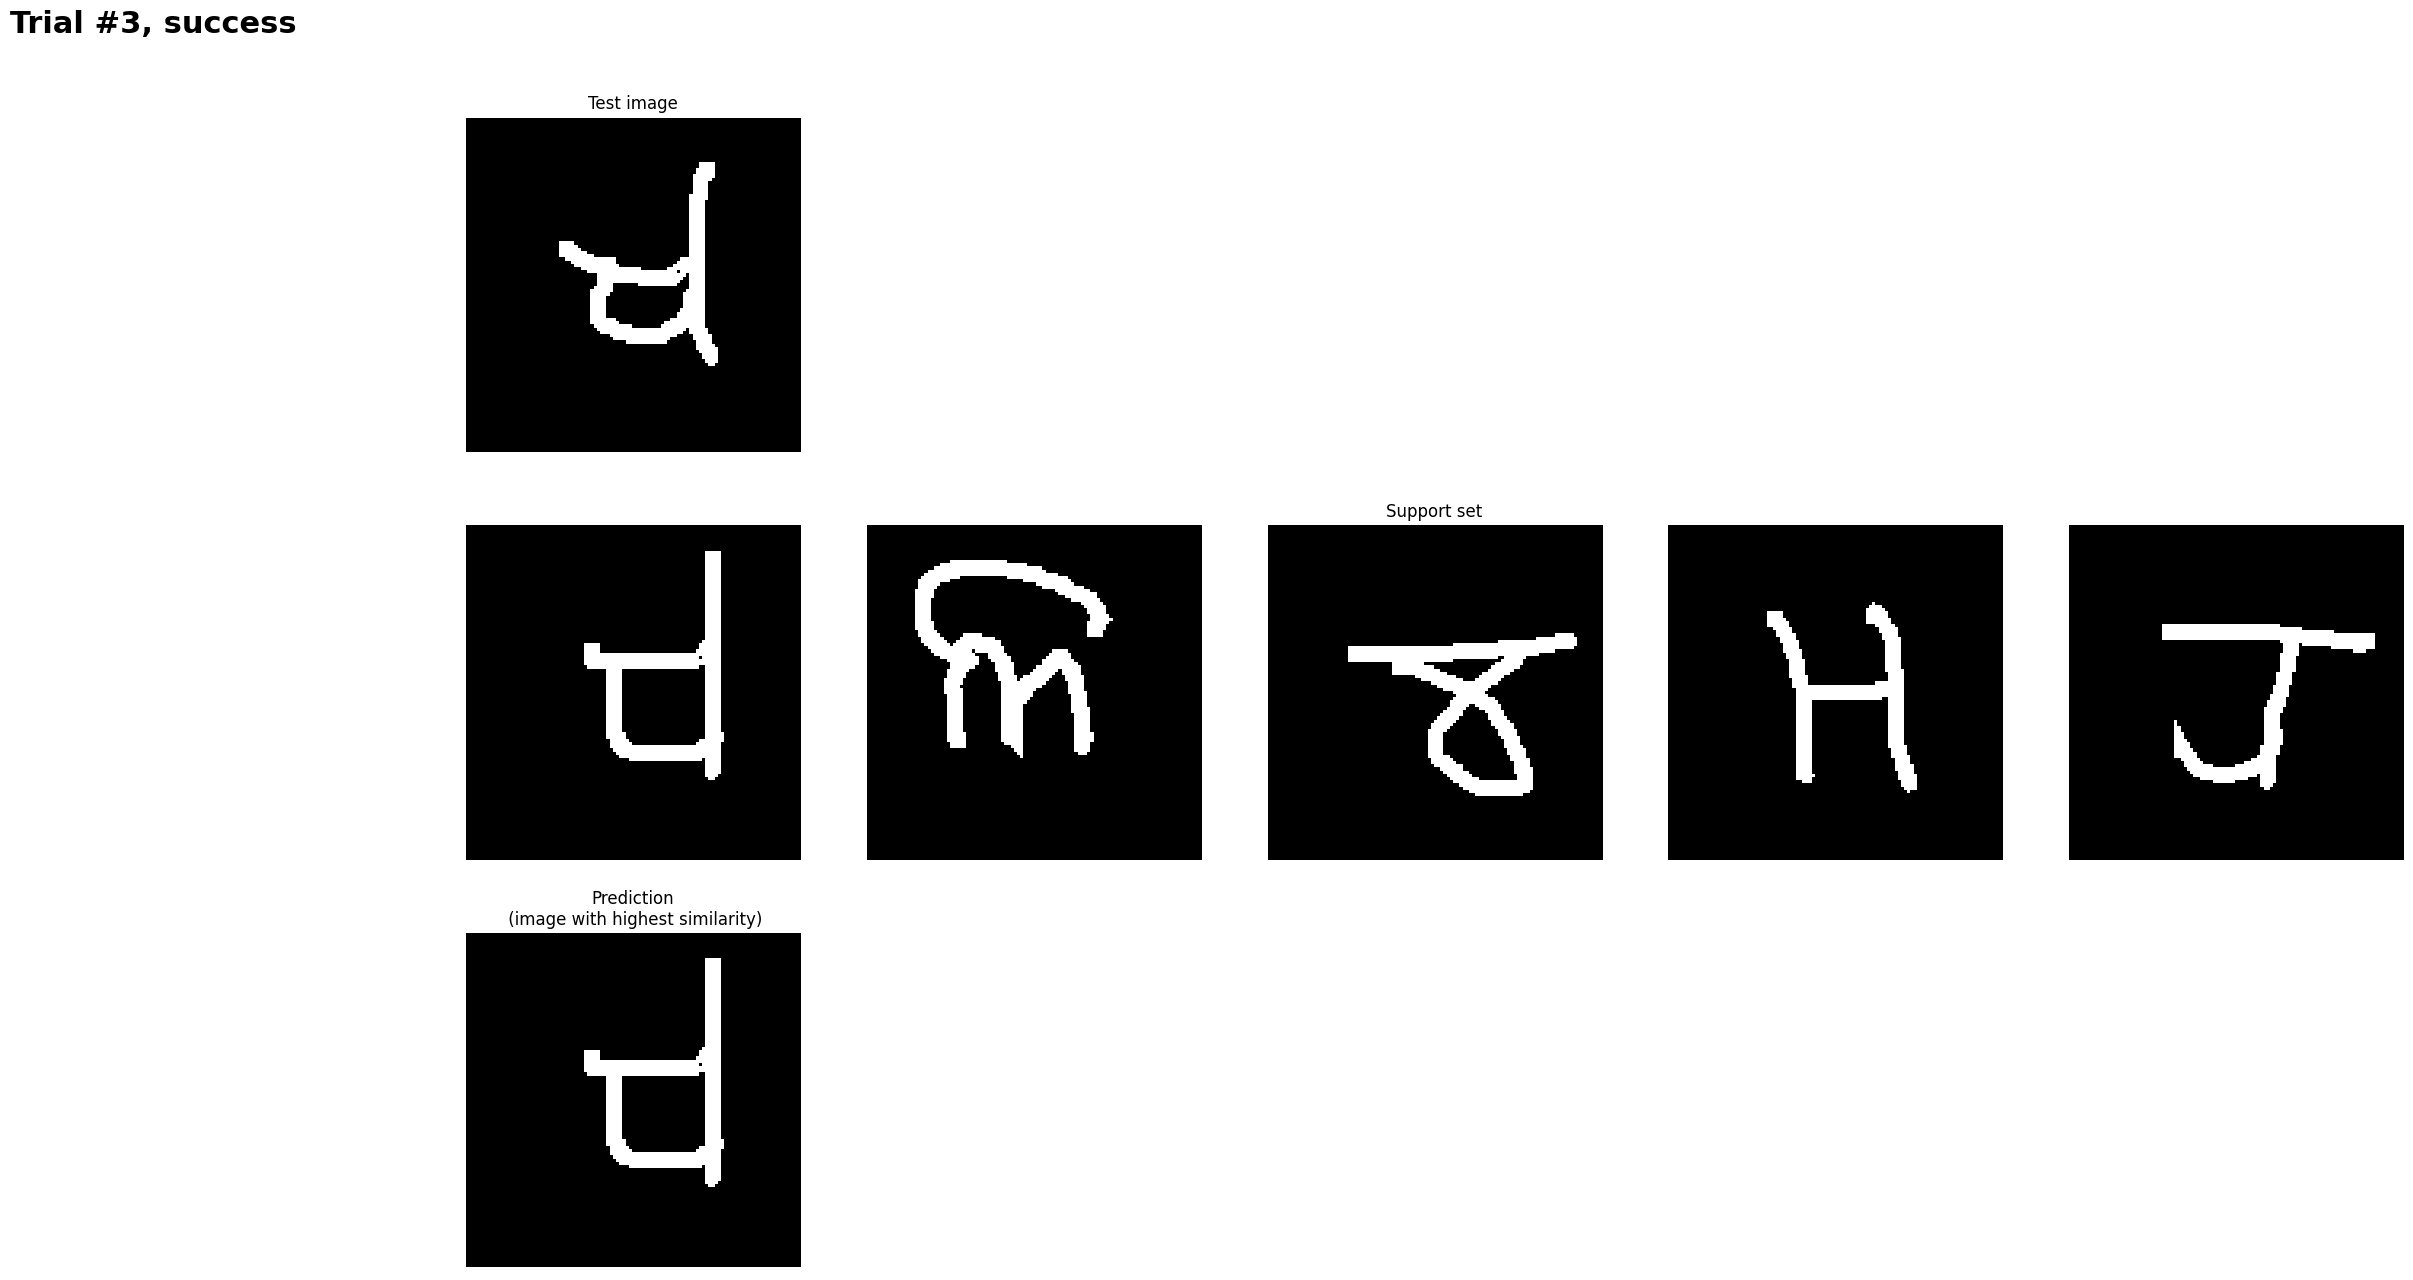

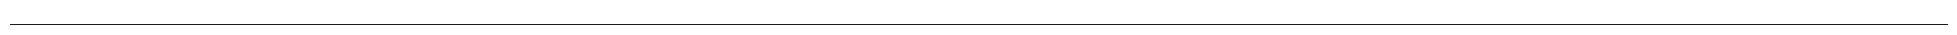

In [26]:
acc = n_way_1shot_task(siamese_model, n_way=5, n_trials=3, display=True)
print("Average accuracy=", acc*100)

##### One-shot 20-way test

Average accuracy= 66.66666666666666


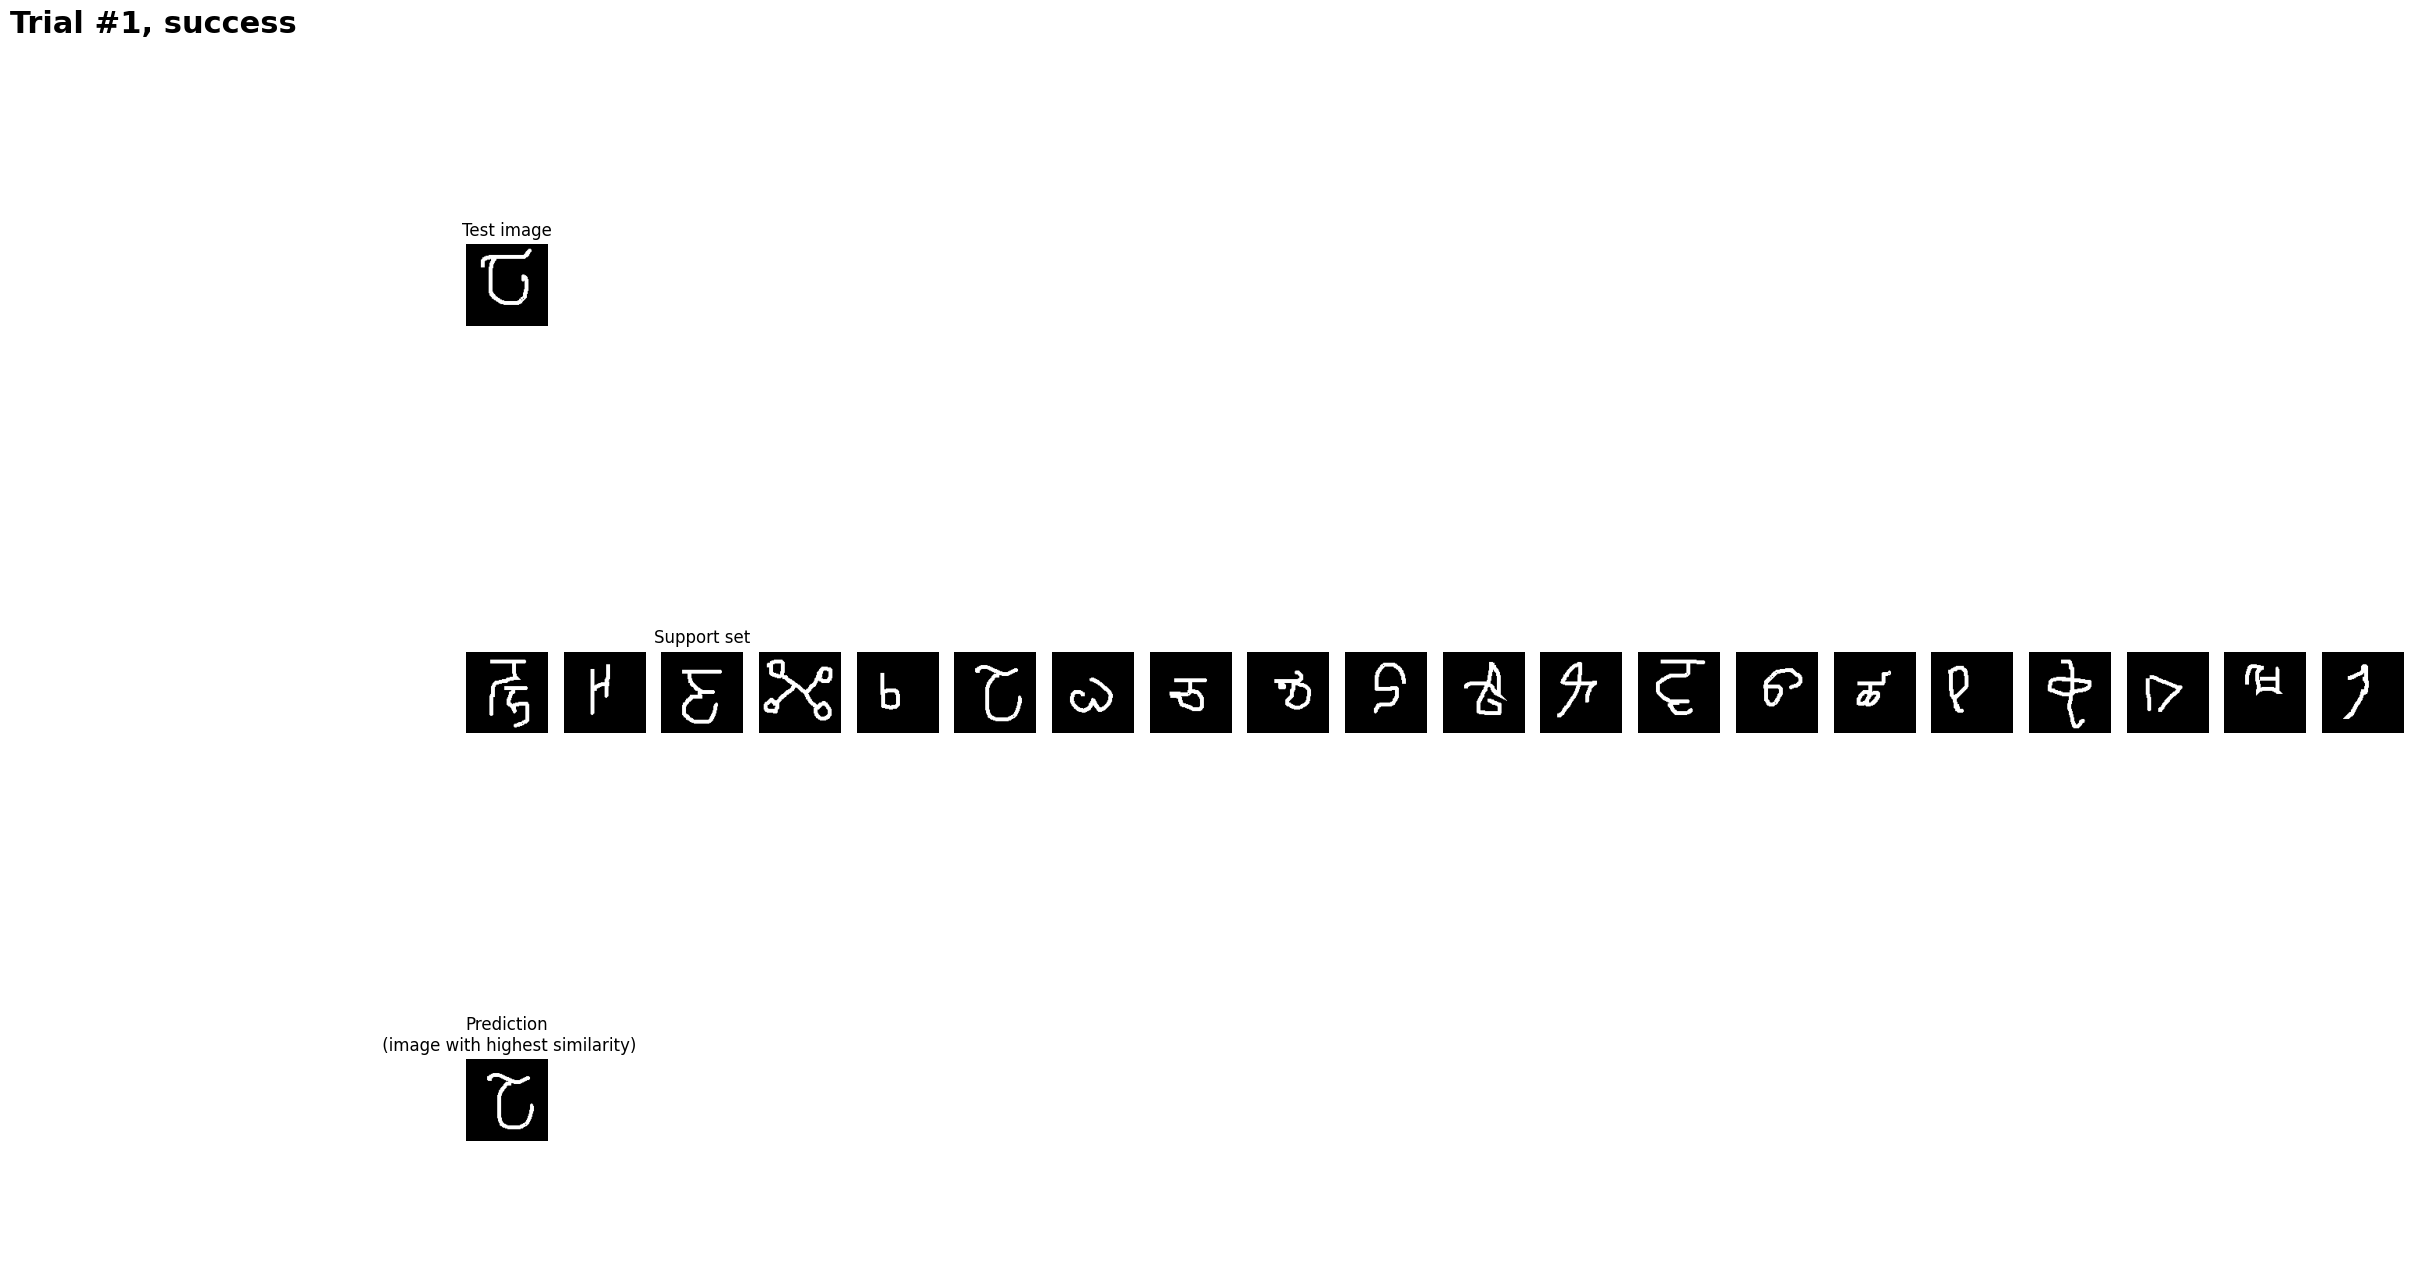

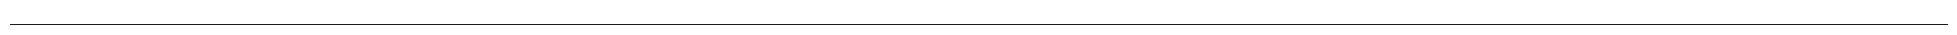

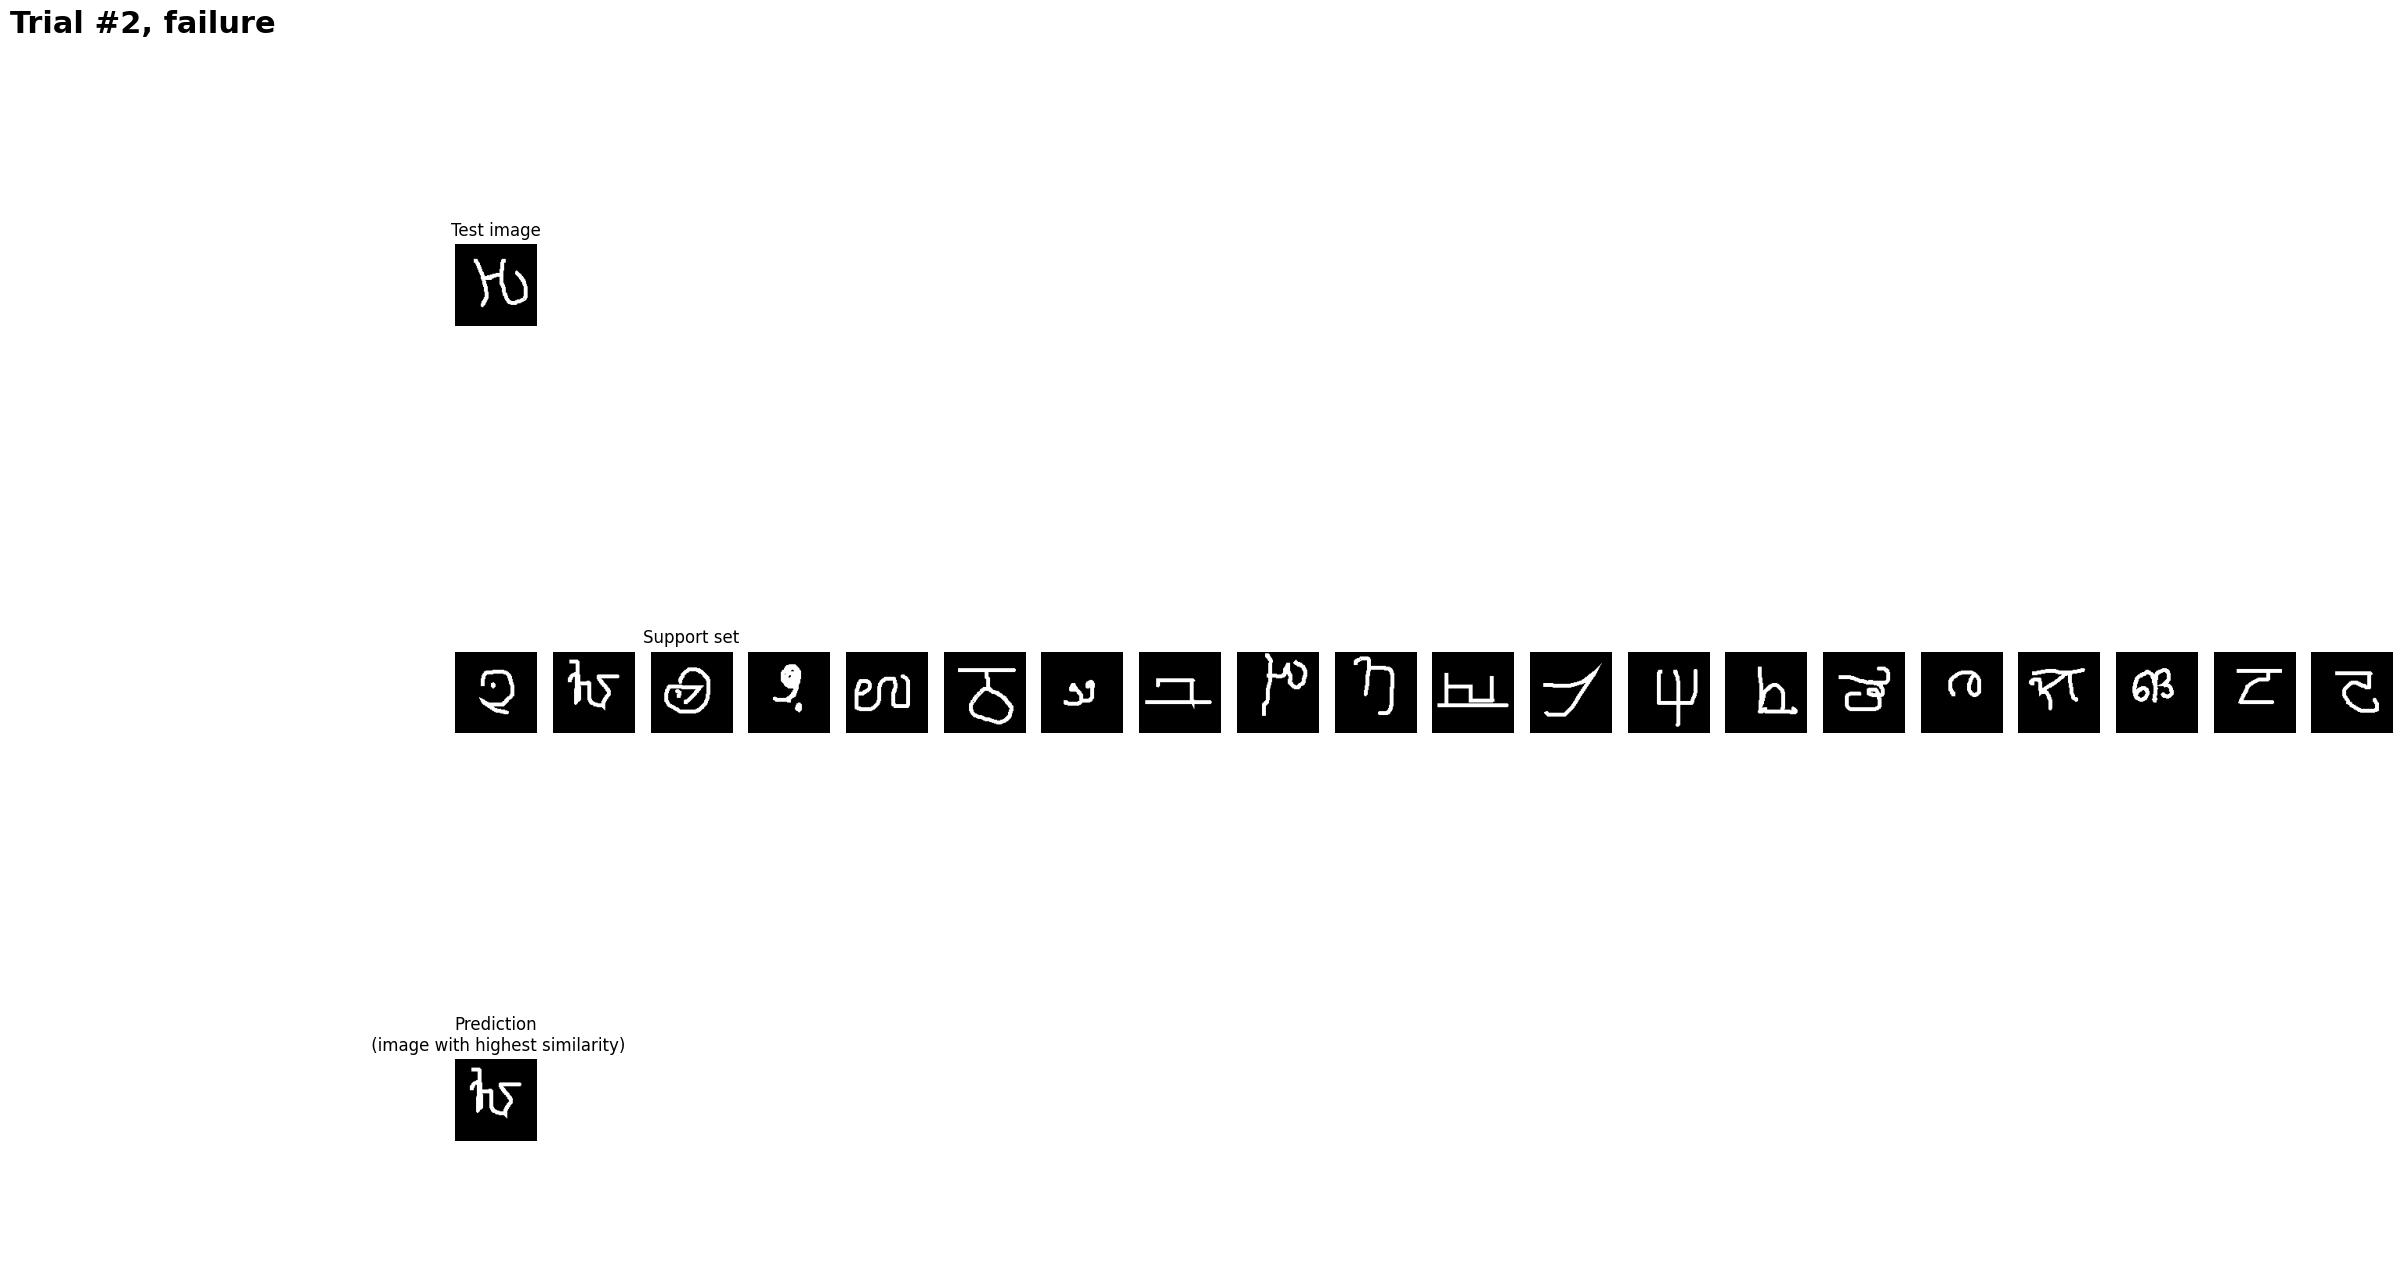

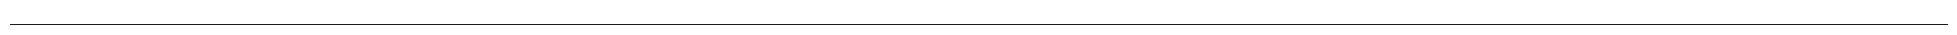

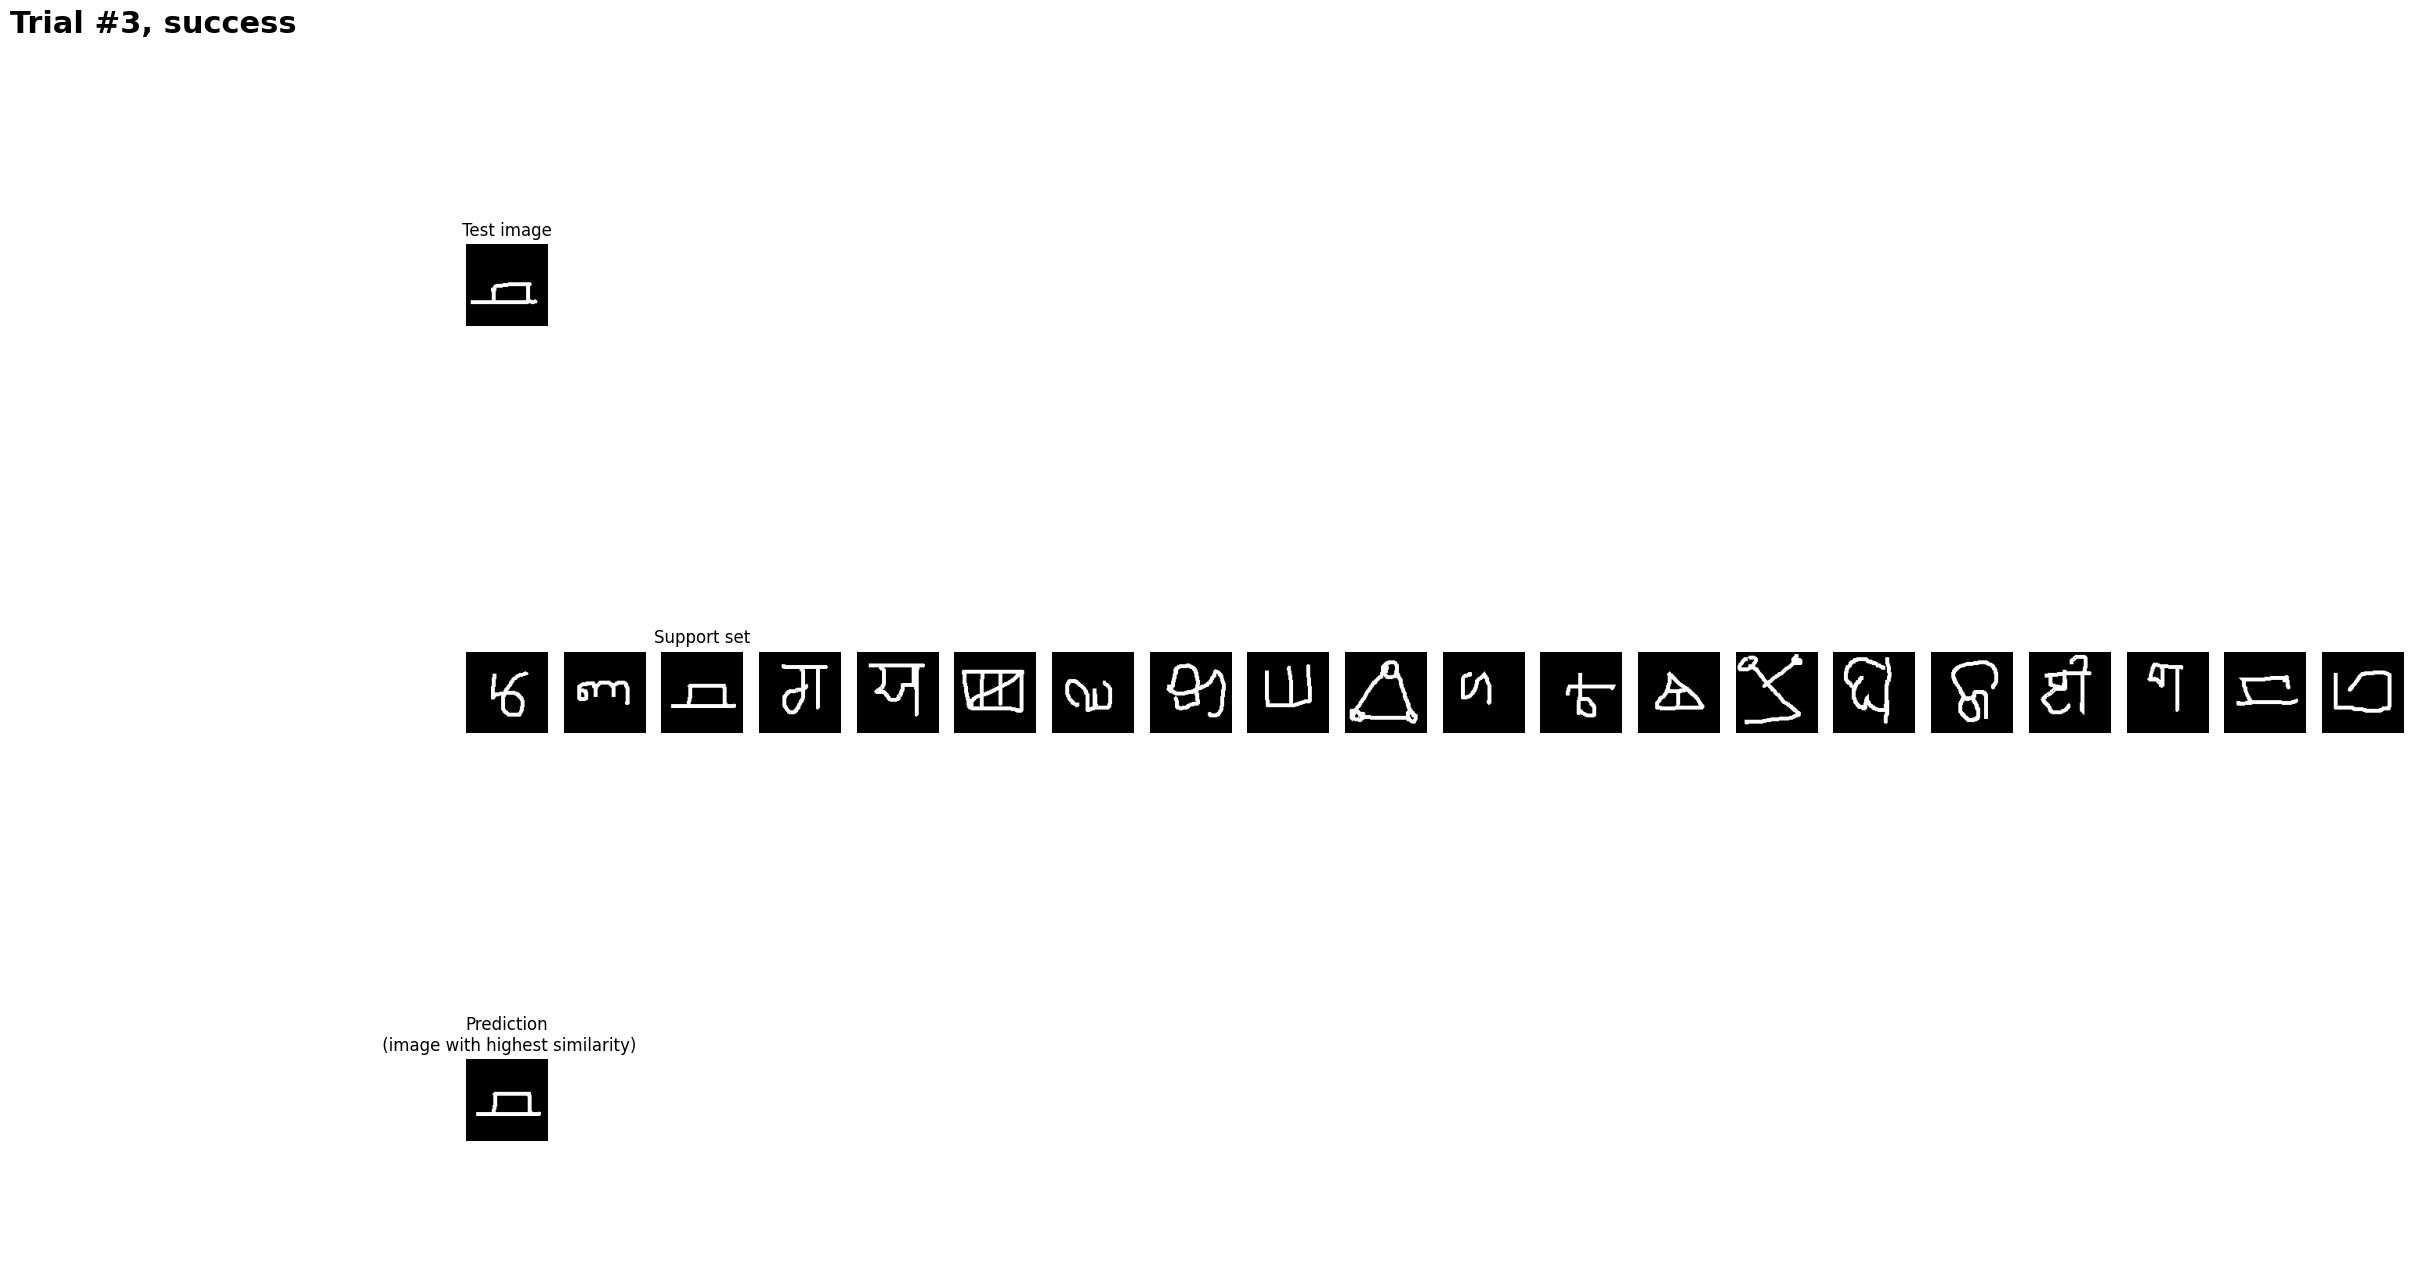

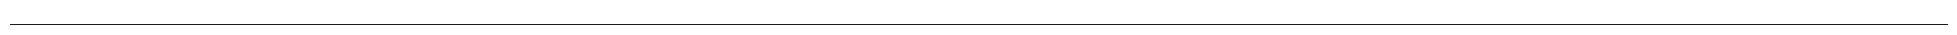

In [27]:
acc = n_way_1shot_task(siamese_model, n_way=20, n_trials=3, display=True)
print("Average accuracy=", acc*100)